In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("C:\\Users\\Dell\\campusx_badhiya_wala_project_isi_folder_me_sab_h\\gurgaon_properties_missing_value_imputation.csv")

In [5]:
df.shape

(3554, 18)

In [6]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss residency,sector 6,0.48,5333.33,3,2,2,2.0,Moderately Old,111.0,0,0,0,0,0,0,54
1,flat,ansal housing highland park,sector 103,1.10,6242.91,3,3,3+,7.0,New Property,1500.0,0,0,0,0,0,0,87
2,flat,sapphire eighty three,sector 83,0.65,9285.71,1,1,0,6.0,Relatively New,700.0,0,0,0,0,0,0,0
3,flat,unitech the residences,sector 33,1.35,8737.86,3,4,2,8.0,Moderately Old,1398.0,0,1,0,0,0,0,49
4,flat,m3m capital,sector 113,3.25,14142.73,4,4,3+,34.0,Under Construction,2553.0,1,1,0,1,0,0,115


In [7]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [8]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 6,0.48,3,2,2,2.0,Moderately Old,111.0,0,0,0,0,0,0,54
1,flat,sector 103,1.10,3,3,3+,7.0,New Property,1500.0,0,0,0,0,0,0,87
2,flat,sector 83,0.65,1,1,0,6.0,Relatively New,700.0,0,0,0,0,0,0,0
3,flat,sector 33,1.35,3,4,2,8.0,Moderately Old,1398.0,0,1,0,0,0,0,49
4,flat,sector 113,3.25,4,4,3+,34.0,Under Construction,2553.0,1,1,0,1,0,0,115


# luxury score

<Axes: ylabel='luxury_score'>

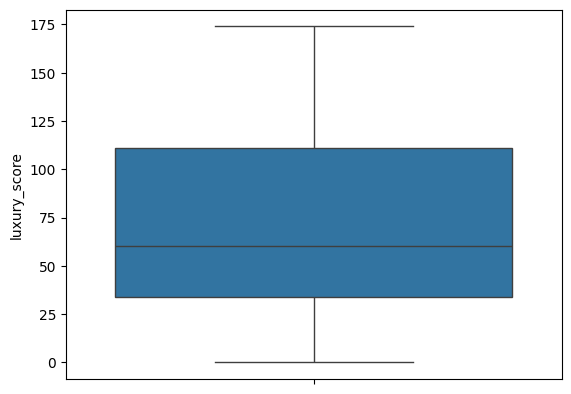

In [9]:
sns.boxplot(df['luxury_score'])

In [10]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins


In [11]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [12]:
train_df.head()


,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 6,0.48,3,2,2,2.0,Moderately Old,111.0,0,0,0,0,0,0,54,Medium
1,flat,sector 103,1.10,3,3,3+,7.0,New Property,1500.0,0,0,0,0,0,0,87,Medium
2,flat,sector 83,0.65,1,1,0,6.0,Relatively New,700.0,0,0,0,0,0,0,0,Low
3,flat,sector 33,1.35,3,4,2,8.0,Moderately Old,1398.0,0,1,0,0,0,0,49,Low
4,flat,sector 113,3.25,4,4,3+,34.0,Under Construction,2553.0,1,1,0,1,0,0,115,Medium


# floorNum

<Axes: ylabel='floorNum'>

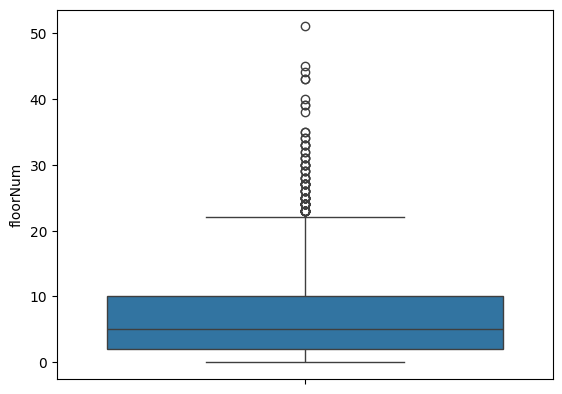

In [13]:
sns.boxplot(df['floorNum'])

In [15]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [16]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 6,0.48,3,2,2,2.0,Moderately Old,111.0,0,0,0,0,0,0,54,Medium,Low Floor
1,flat,sector 103,1.10,3,3,3+,7.0,New Property,1500.0,0,0,0,0,0,0,87,Medium,Mid Floor
2,flat,sector 83,0.65,1,1,0,6.0,Relatively New,700.0,0,0,0,0,0,0,0,Low,Mid Floor
3,flat,sector 33,1.35,3,4,2,8.0,Moderately Old,1398.0,0,1,0,0,0,0,49,Low,Mid Floor
4,flat,sector 113,3.25,4,4,3+,34.0,Under Construction,2553.0,1,1,0,1,0,0,115,Medium,High Floor


In [18]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 6,0.48,3,2,2,Moderately Old,111.0,0,0,0,0,0,0,Medium,Low Floor
1,flat,sector 103,1.10,3,3,3+,New Property,1500.0,0,0,0,0,0,0,Medium,Mid Floor
2,flat,sector 83,0.65,1,1,0,Relatively New,700.0,0,0,0,0,0,0,Low,Mid Floor
3,flat,sector 33,1.35,3,4,2,Moderately Old,1398.0,0,1,0,0,0,0,Low,Mid Floor
4,flat,sector 113,3.25,4,4,3+,Under Construction,2553.0,1,1,0,1,0,0,Medium,High Floor


In [19]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [20]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,69.0,3,2,2.0,0.0,111.0,0,0,0,0,0,0,2.0,1.0
1,0.0,7.0,3,3,4.0,1.0,1500.0,0,0,0,0,0,0,2.0,2.0
2,0.0,97.0,1,1,0.0,3.0,700.0,0,0,0,0,0,0,1.0,2.0
3,0.0,41.0,3,4,2.0,0.0,1398.0,0,1,0,0,0,0,1.0,2.0
4,0.0,19.0,4,4,4.0,4.0,2553.0,1,1,0,1,0,0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,101.0,2,2,1.0,1.0,694.0,0,0,0,0,0,0,1.0,2.0
3550,0.0,29.0,2,2,2.0,1.0,1285.0,1,1,0,1,0,0,1.0,2.0
3551,1.0,13.0,4,4,4.0,3.0,2430.0,1,1,1,1,0,0,0.0,1.0
3552,0.0,93.0,1,1,1.0,3.0,761.0,0,0,0,0,0,0,2.0,0.0


In [21]:
y_label

0       0.48
1       1.10
2       0.65
3       1.35
4       3.25
        ... 
3549    0.45
3550    1.99
3551    6.00
3552    0.85
3553    0.42
Name: price, Length: 3554, dtype: float64

# Technique 1 - Correlation Analysis


<Axes: >

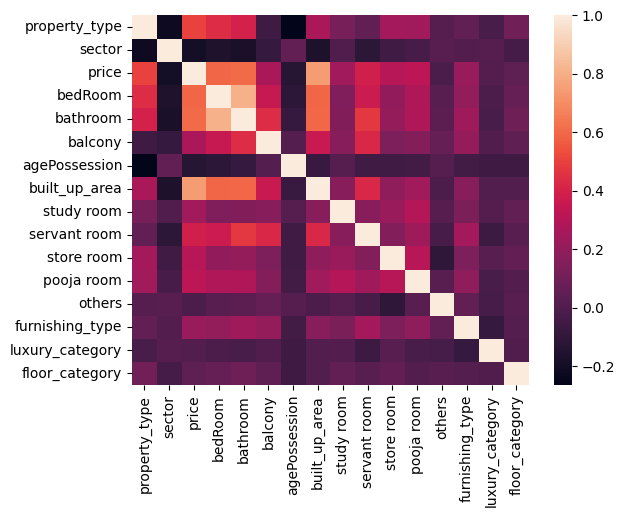

In [22]:
sns.heatmap(data_label_encoded.corr())

In [23]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.198529
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.133528
6,built_up_area,0.744312
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


# Technique 2 - Random Forest Feature Importance

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.646679
0,property_type,0.104568
1,sector,0.101485
2,bedRoom,0.026449
3,bathroom,0.025392
8,servant room,0.018696
5,agePossession,0.014368
4,balcony,0.012579
12,furnishing_type,0.010812
9,store room,0.008366


# Technique 3 - Gradient Boosting Feature importances


In [25]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.682163
1,sector,0.102499
0,property_type,0.101153
3,bathroom,0.033561
2,bedRoom,0.032869
8,servant room,0.023474
9,store room,0.009662
5,agePossession,0.005574
12,furnishing_type,0.003596
7,study room,0.002215


# Technique 4 - Permutation Importance


In [26]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.632402
0,property_type,0.147018
1,sector,0.123804
2,bedRoom,0.033898
3,bathroom,0.023981
8,servant room,0.008806
10,pooja room,0.005149
7,study room,0.003954
5,agePossession,0.003220
9,store room,0.002528


# Technique 5 - LASSO

In [28]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)
fi_df5

,feature,lasso_coeff
6,built_up_area,1.513433
0,property_type,0.761991
3,bathroom,0.270421
9,store room,0.189282
7,study room,0.167748
8,servant room,0.159809
12,furnishing_type,0.158476
10,pooja room,0.078348
13,luxury_category,0.052180
2,bedRoom,0.017824


# Technique 6 - RFE

In [29]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.648186
1,sector,0.104012
0,property_type,0.102539
3,bathroom,0.026589
2,bedRoom,0.025560
8,servant room,0.018891
5,agePossession,0.012820
4,balcony,0.012562
12,furnishing_type,0.010404
13,luxury_category,0.007790


# Technique 7 - Linear Regression Weights

In [31]:
from sklearn.linear_model import LinearRegression  # ✅ Required import

# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract feature importances (coefficients)
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7  # Show the DataFrame


,feature,reg_coeffs
6,built_up_area,1.516088
0,property_type,0.762114
3,bathroom,0.277012
9,store room,0.193677
7,study room,0.175746
8,servant room,0.169013
12,furnishing_type,0.167762
10,pooja room,0.081365
13,luxury_category,0.063578
2,bedRoom,0.020526


# Technique 8 - SHAP

In [32]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.1 which is incompatible.
pycaret 3.3.2 requires joblib<1.4,>=1.2.0, but you have joblib 1.5.1 which is incompatible.
ydata-profiling 4.16.1 requires visions[type_image_path]<0.8.2,>=0.7.5, but you have visions 0.7.4 which is incompatible.


In [33]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-0.18056744,  0.33313627, -0.05772717, ..., -0.01102727,
         0.00904747, -0.01498984],
       [-0.27076711, -0.20926311, -0.02489481, ..., -0.01193201,
        -0.00863642, -0.02938659],
       [-0.18629707, -0.17995826, -0.02419312, ..., -0.01183625,
        -0.00558617, -0.00506064],
       ...,
       [ 1.99258821, -0.35723486,  0.02136015, ..., -0.02081857,
        -0.00649054, -0.02023973],
       [-0.15364363, -0.04660788, -0.00529132, ..., -0.01263586,
         0.00889132,  0.0324182 ],
       [-0.19545191, -0.53281943, -0.05410245, ..., -0.0208918 ,
        -0.00621277, -0.00930549]])

In [34]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.251093
0,property_type,0.477097
1,sector,0.376286
3,bathroom,0.140392
8,servant room,0.093845
2,bedRoom,0.059734
4,balcony,0.038384
12,furnishing_type,0.028000
5,agePossession,0.025856
14,floor_category,0.024157


In [35]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [36]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.198529,0.101485,0.102499,0.123804,-0.045839,0.104012,-0.054865,0.376286
bedRoom,0.591289,0.026449,0.032869,0.033898,0.017824,0.025560,0.020526,0.059734
bathroom,0.609777,0.025392,0.033561,0.023981,0.270421,0.026589,0.277012,0.140392
balcony,0.269637,0.012579,0.001732,-0.006020,-0.035411,0.012562,-0.058155,0.038384
agePossession,-0.133528,0.014368,0.005574,0.003220,-0.000000,0.012820,0.001111,0.025856
built_up_area,0.744312,0.646679,0.682163,0.632402,1.513433,0.648186,1.516088,1.251093
study room,0.242955,0.007728,0.002215,0.003954,0.167748,0.007609,0.175746,0.021034
servant room,0.391930,0.018696,0.023474,0.008806,0.159809,0.018891,0.169013,0.093845
store room,0.305677,0.008366,0.009662,0.002528,0.189282,0.007124,0.193677,0.013854


In [37]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [39]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.711886
sector             0.134205
bathroom           0.038164
bedRoom            0.032760
servant room       0.024633
agePossession      0.010535
balcony            0.008182
furnishing_type    0.007883
store room         0.007530
study room         0.006863
pooja room         0.005475
floor_category     0.005404
luxury_category    0.004441
others             0.002038
dtype: float64

In [41]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,69.0,3,2,2.0,0.0,111.0,0,0,0,0,0,0,2.0,1.0
1,0.0,7.0,3,3,4.0,1.0,1500.0,0,0,0,0,0,0,2.0,2.0
2,0.0,97.0,1,1,0.0,3.0,700.0,0,0,0,0,0,0,1.0,2.0
3,0.0,41.0,3,4,2.0,0.0,1398.0,0,1,0,0,0,0,1.0,2.0
4,0.0,19.0,4,4,4.0,4.0,2553.0,1,1,0,1,0,0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,101.0,2,2,1.0,1.0,694.0,0,0,0,0,0,0,1.0,2.0
3550,0.0,29.0,2,2,2.0,1.0,1285.0,1,1,0,1,0,0,1.0,2.0
3551,1.0,13.0,4,4,4.0,3.0,2430.0,1,1,1,1,0,0,0.0,1.0
3552,0.0,93.0,1,1,1.0,3.0,761.0,0,0,0,0,0,0,2.0,0.0


In [42]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [43]:
scores.mean()

0.8022141111562441

In [44]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [45]:
scores.mean()

0.7985892360811454

In [47]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [48]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [49]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,69.0,3,2,2.0,0.0,111.0,0,0,0,2.0,1.0,0.48
1,0.0,7.0,3,3,4.0,1.0,1500.0,0,0,0,2.0,2.0,1.10
2,0.0,97.0,1,1,0.0,3.0,700.0,0,0,0,1.0,2.0,0.65
3,0.0,41.0,3,4,2.0,0.0,1398.0,1,0,0,1.0,2.0,1.35
4,0.0,19.0,4,4,4.0,4.0,2553.0,1,0,0,2.0,0.0,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,101.0,2,2,1.0,1.0,694.0,0,0,0,1.0,2.0,0.45
3550,0.0,29.0,2,2,2.0,1.0,1285.0,1,0,0,1.0,2.0,1.99
3551,1.0,13.0,4,4,4.0,3.0,2430.0,1,1,0,0.0,1.0,6.00
3552,0.0,93.0,1,1,1.0,3.0,761.0,0,0,0,2.0,0.0,0.85
